In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt

from src.zoning import create_grid_zones


In [5]:
import os
print(os.getcwd())


/Users/obypa/Documents/GitHub/security-games-uk-patrols/notebooks


In [7]:
df = pd.read_csv("../data/sample/crime_rows_5m_sample_500.csv")

print("Rows:", df.shape[0])
df.head()


Rows: 500


,crime_category,persistent_id,month,latitude,longitude,street_id,street_name,location_type,outcome_category,outcome_date,query_month
0,shoplifting,50614e278b7ffd55a11676d67e00def5729c170fb0469a...,2025-08,51.512166,-0.123818,1678947,On or near Shopping Area,Force,Investigation complete; no suspect identified,2025-08,2025-08
1,other-crime,d9e30b5370e652ac3695ba88cc1d91c396d667c75fd228...,2025-07,51.520408,-0.136041,1677241,On or near Charlotte Mews,Force,Status update unavailable,2025-11,2025-07
2,theft-from-the-person,1efe7a7b99aa5b8a2b8bdbd79eeb8cf0818306cd0af419...,2025-11,51.511884,-0.108027,1490749,On or near Temple Avenue,Force,Investigation complete; no suspect identified,2025-11,2025-11
3,shoplifting,d2a4e39216d2cb3808a397175cdbb97cb45f01faff66b5...,2025-09,51.498595,-0.113202,1680677,On or near Newnham Terrace,Force,Investigation complete; no suspect identified,2025-09,2025-09
4,robbery,d75b6ca1ed837a3ca25439a9ef021d67e094f6ce28a86b...,2025-09,51.511790,-0.132459,1677744,On or near A401,Force,Under investigation,2025-09,2025-09


In [8]:
zones = create_grid_zones(df, grid_size_m=300)

zones.head()

,zone_id,lat_bin,lon_bin,crime_count,centroid_lat,centroid_lon
0,z_6_4,6,4,42,51.511456,-0.130365
1,z_7_4,7,4,37,51.514151,-0.130365
2,z_7_2,7,2,23,51.514151,-0.139026
3,z_8_4,8,4,22,51.516846,-0.130365
4,z_6_3,6,3,21,51.511456,-0.134696


In [9]:
print("Total zones:", len(zones))
print("Max crimes in zone:", zones["crime_count"].max())
print("Mean crimes per zone:", zones["crime_count"].mean())

Total zones: 84
Max crimes in zone: 42
Mean crimes per zone: 5.9523809523809526


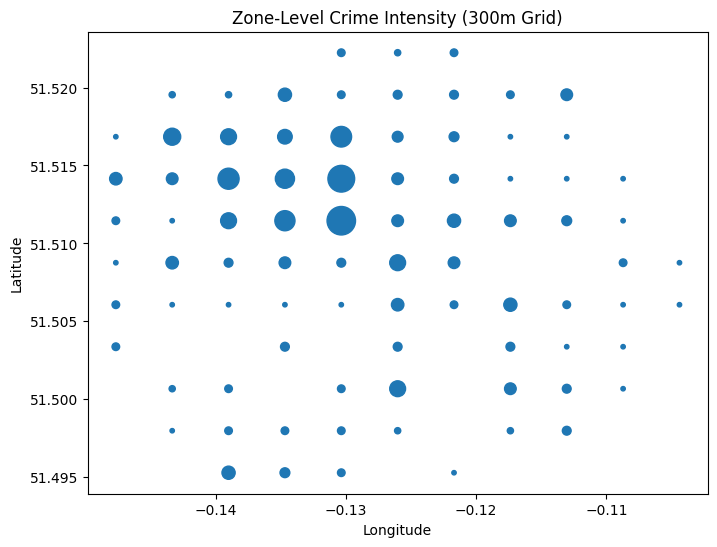

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(
    zones["centroid_lon"],
    zones["centroid_lat"],
    s=zones["crime_count"] * 10
)
plt.title("Zone-Level Crime Intensity (300m Grid)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [12]:
zones.to_csv("../data/sample/zones_westminster_500rows.csv", index=False)